Let’s consider that you want to study the relationship between **2 numerical variables** with a lot of points. Then you can consider the number of points on each part of the plotting area and thus calculate a **2D kernel density estimate**. It is like a smoothed histogram. Instead of a point falling into a particular bin, it adds a weight to surrounding bins. This plot is inspired from this [stack overflow question](https://stackoverflow.com/questions/19390320/scatterplot-contours-in-matplotlib). See [this page](https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/) to custom the color palette.

In [2]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = np.random.normal(size=500)
y = x * 3 + np.random.normal(size=500)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 

/var/folders/4m/cdm9j52s2fs9_8ccjqtb1sy00000gn/T/ipykernel_61851/4198617978.py:12: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])


In [5]:
zi.shape

(90000,)

In [8]:
np.argmax(zi)

41840

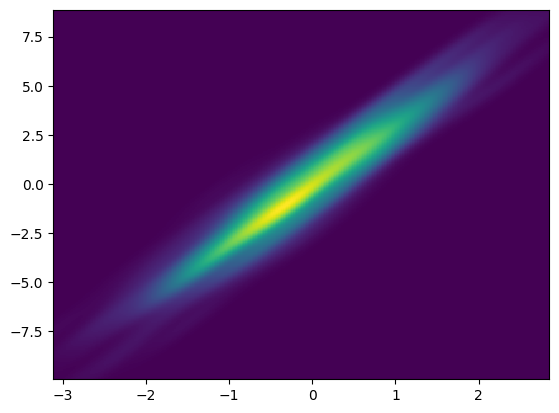

[-0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0.32302442
 -0.32302442 -0.32302442 -0.32302442 -0.32302442 -0

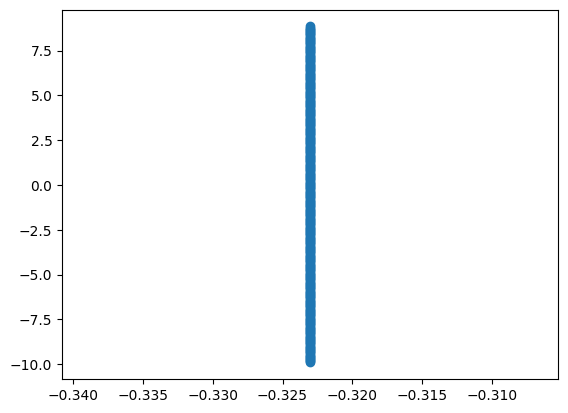

In [7]:
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.show()
print(xi[np.argmax(zi)]%nbins,  yi[np.argmax(zi)]//nbins)
plt.scatter(xi[np.argmax(zi)]%nbins, yi[np.argmax(zi)]//nbins)


You can add a color bar easily using `colorbar()` function.

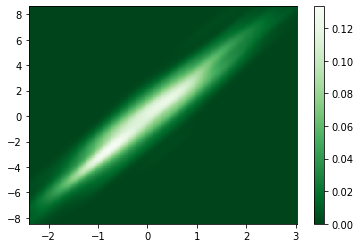

In [9]:
# Add color bar
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.Greens_r)
plt.colorbar()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

IndexError: index 143 is out of bounds for axis 0 with size 2

In [5]:
z.shape, xy.shape

((1000,), (2, 1000))

In [6]:
max_x, max_y = xy[:,np.argmax(z)]

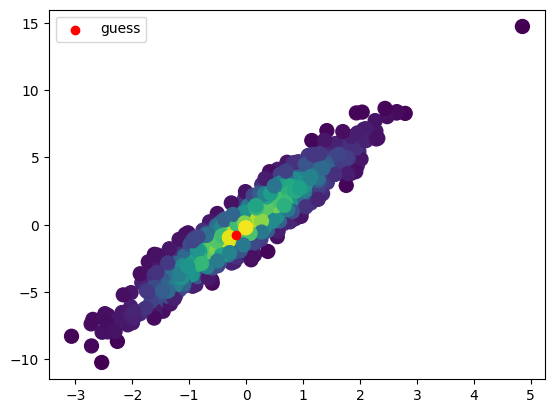

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
ax.scatter(max_x, max_y, c='r', label='guess')
plt.legend()
plt.show()